In [283]:
import pandas as pd 
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [284]:
train= pd.read_csv("StudentsPerformance.csv")

In [285]:
train.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# missing data

In [286]:
#train.isnull()

In [287]:
train.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


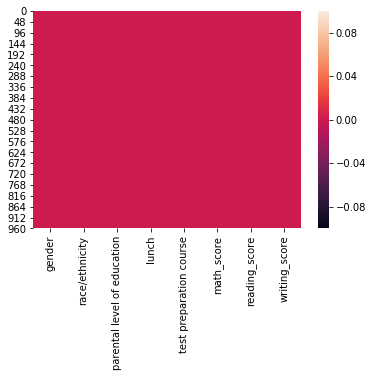

In [288]:
sns.heatmap(train.isnull())

# data visulizations

# For math score


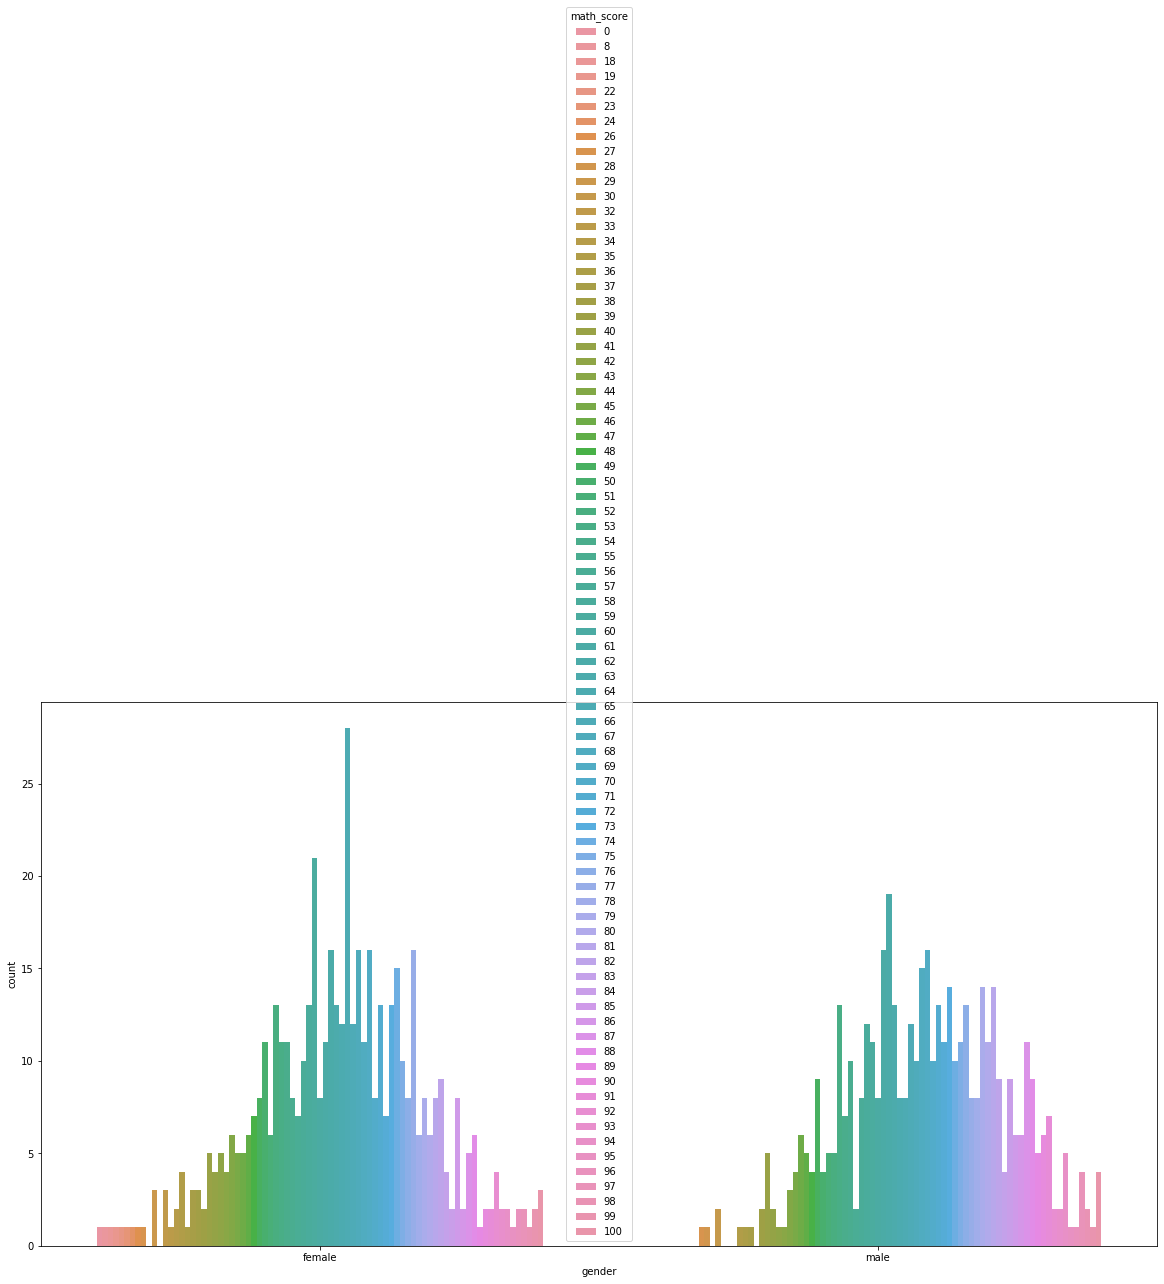

In [289]:
plt.figure(figsize=(20,10))
sns.countplot(x="gender", hue="math_score",data= train)

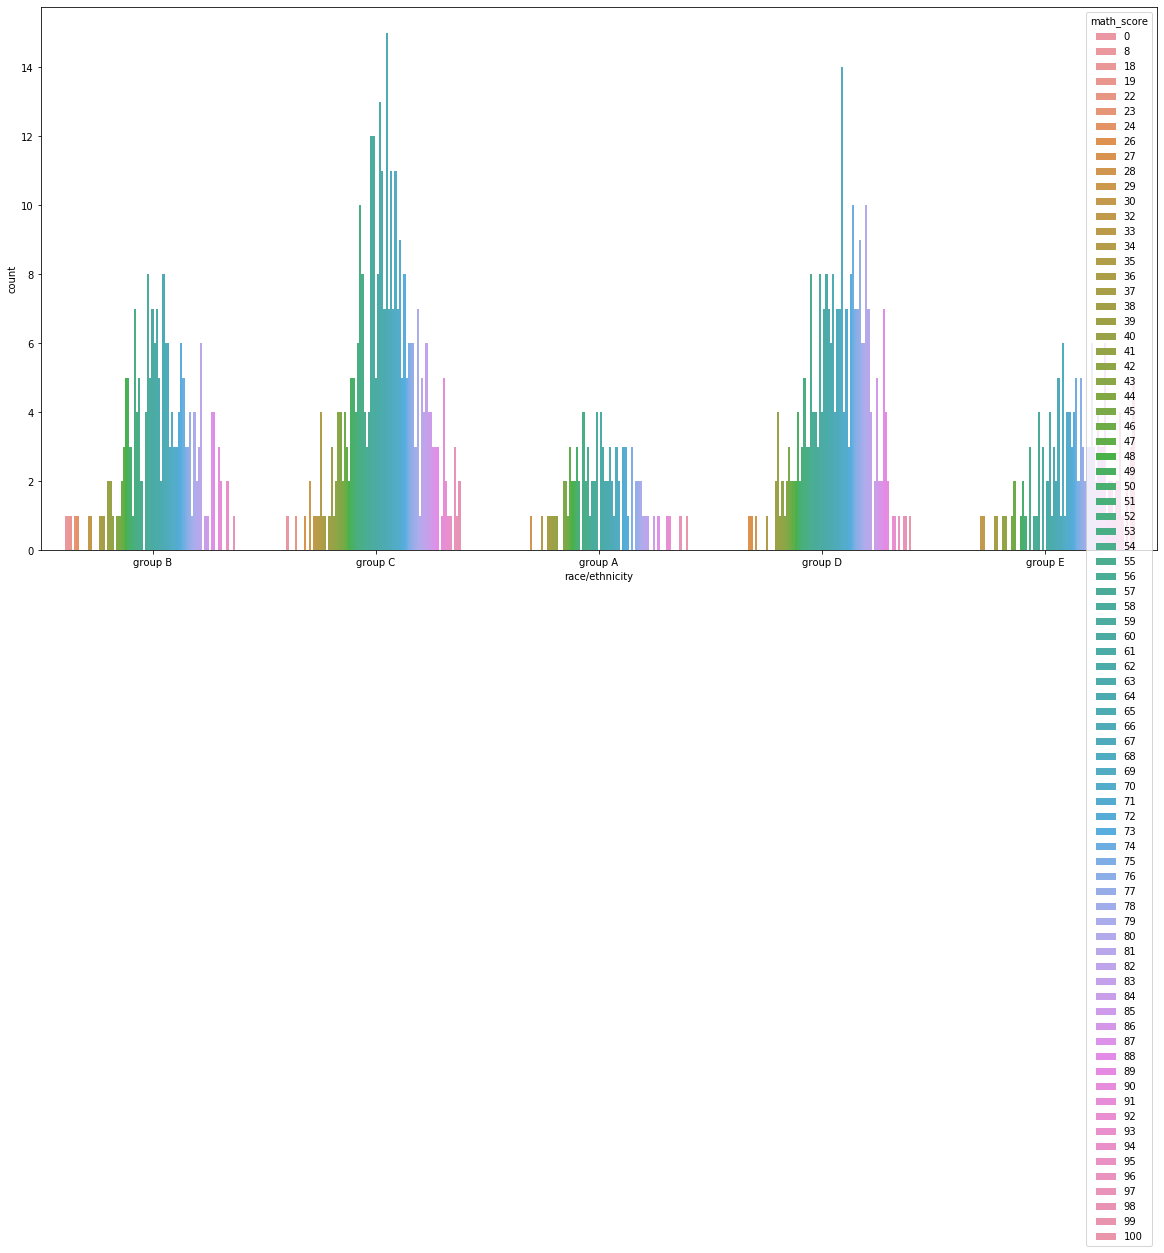

In [290]:
plt.figure(figsize=(20,10))
sns.countplot(x="race/ethnicity", hue="math_score",data= train)

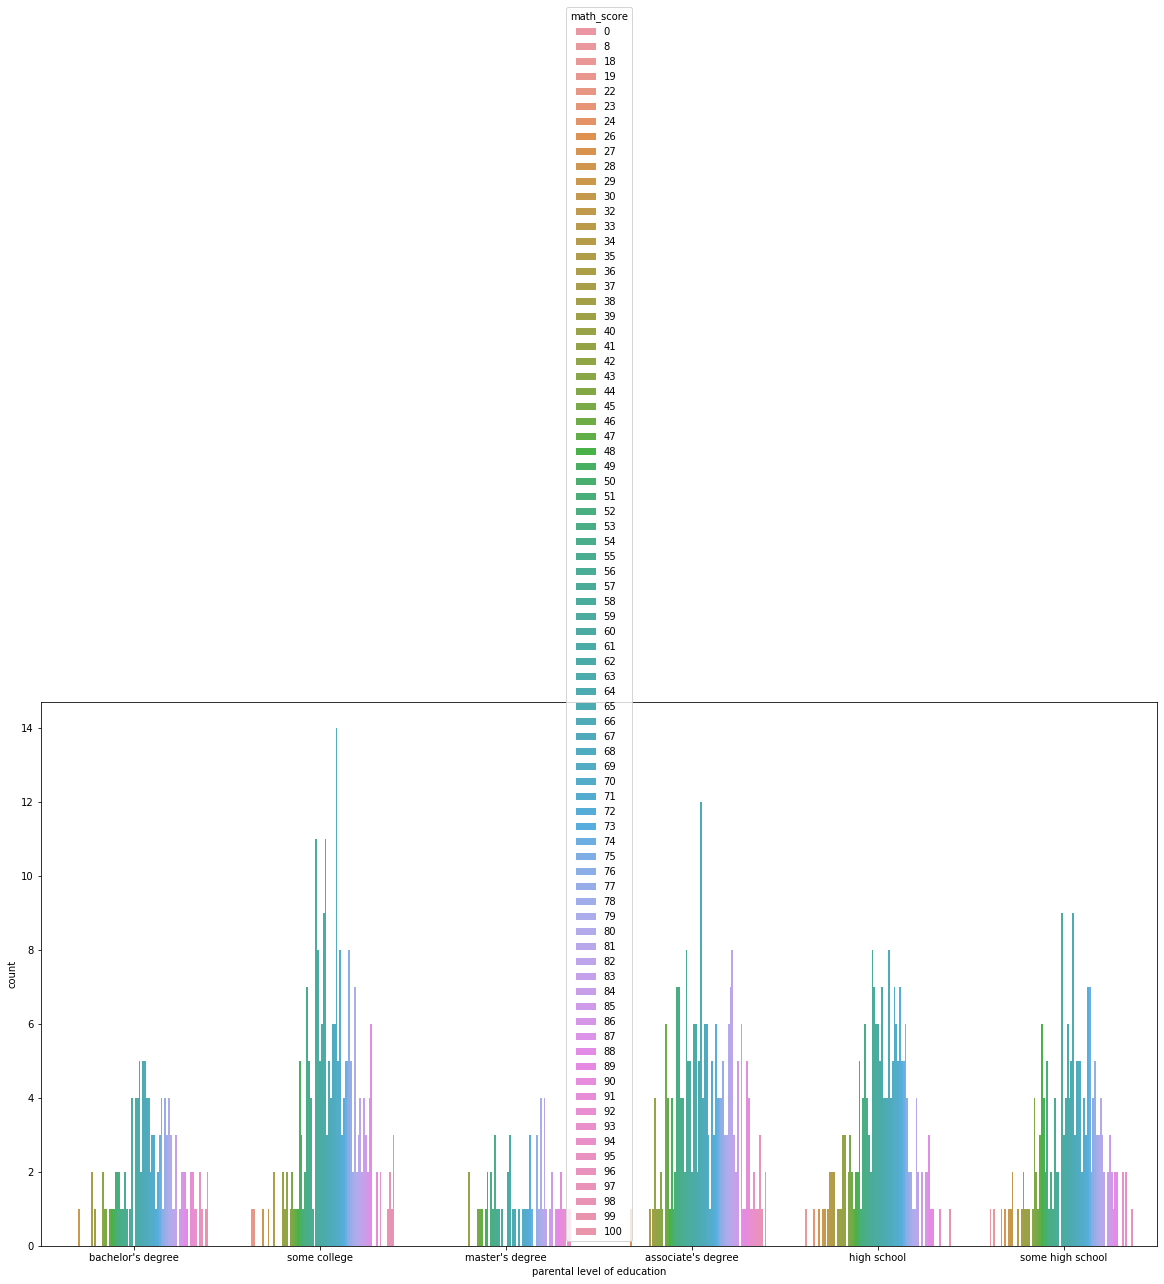

In [291]:
plt.figure(figsize=(20,10))
sns.countplot(x="parental level of education", hue="math_score",data= train)

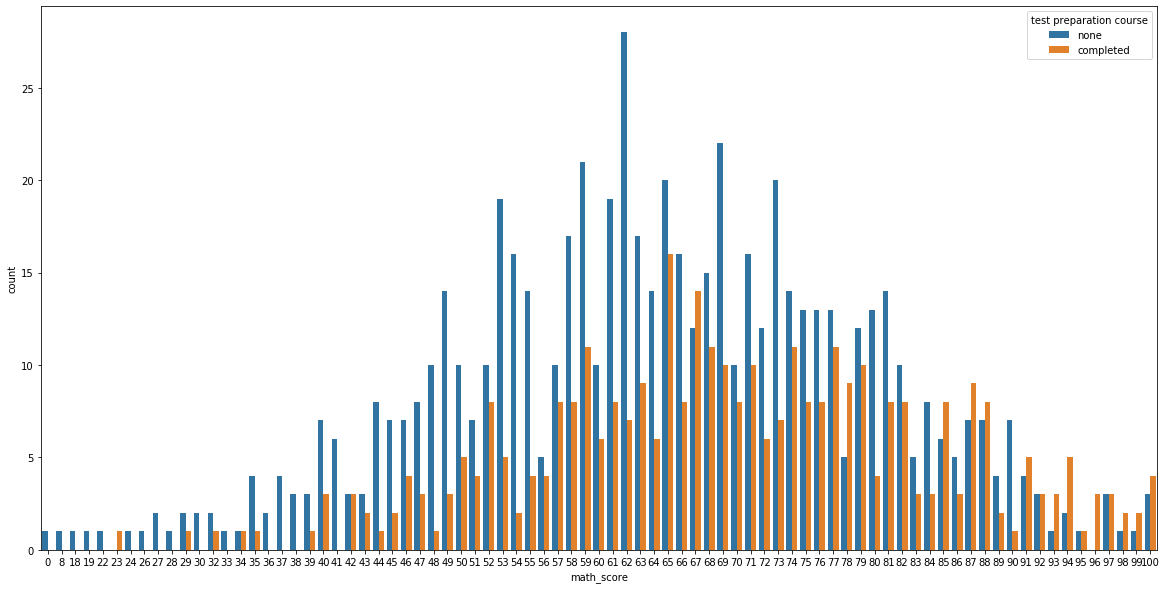

In [292]:
plt.figure(figsize=(20,10))
sns.countplot(x="math_score", hue="test preparation course",data= train)

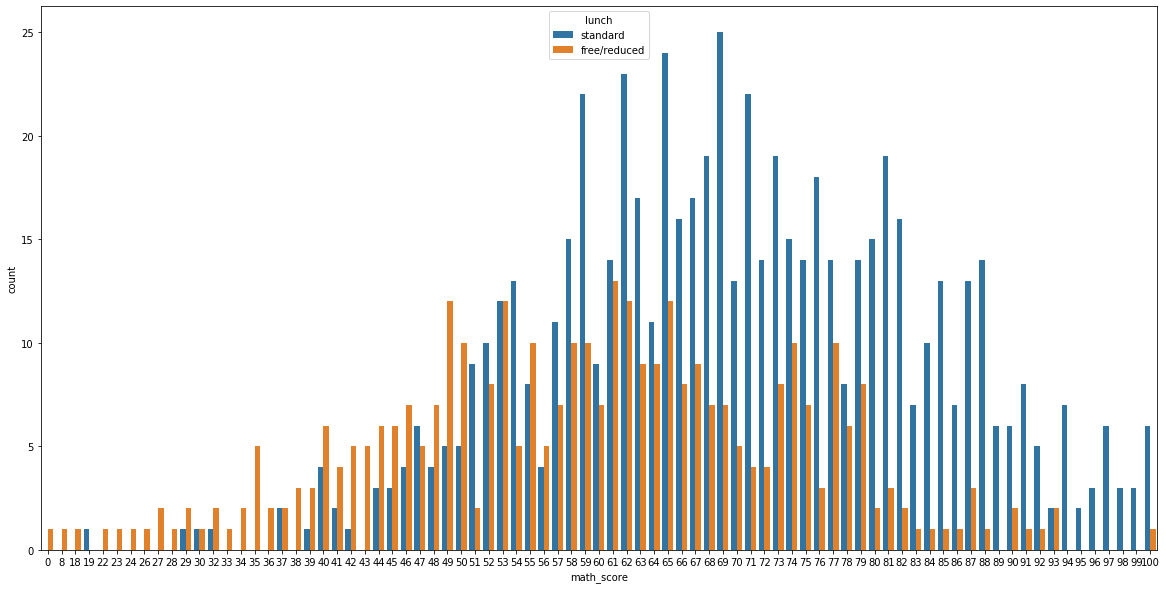

In [293]:
plt.figure(figsize=(20,10))
sns.countplot(x="math_score", hue="lunch",data= train)

In [294]:
gender = pd.get_dummies(train['gender'],drop_first=True)
lunch = pd.get_dummies(train['lunch'],drop_first=True)
test_preparation_course = pd.get_dummies(train['test preparation course'],drop_first=True)
train = pd.concat([train,gender,lunch,test_preparation_course],axis=1)
train.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,male,standard,none
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,1
1,female,group C,some college,standard,completed,69,90,88,0,1,0
2,female,group B,master's degree,standard,none,90,95,93,0,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,1
4,male,group C,some college,standard,none,76,78,75,1,1,1


In [299]:
#df = pd.DataFrame(train)
train=df.drop(['gender',"race/ethnicity","parental level of education","lunch","test preparation course"],axis=1)

In [300]:
train.head()


,math_score,reading_score,writing_score,male,standard,none
0,72,72,74,0,1,1
1,69,90,88,0,1,0
2,90,95,93,0,1,1
3,47,57,44,1,0,1
4,76,78,75,1,1,1


In [301]:
train.describe()

,math_score,reading_score,writing_score,male,standard,none
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,0.482000,0.645000,0.642000
std,15.16308,14.600192,15.195657,0.499926,0.478753,0.479652
min,0.00000,17.000000,10.000000,0.000000,0.000000,0.000000
25%,57.00000,59.000000,57.750000,0.000000,0.000000,0.000000
50%,66.00000,70.000000,69.000000,0.000000,1.000000,1.000000
75%,77.00000,79.000000,79.000000,1.000000,1.000000,1.000000
max,100.00000,100.000000,100.000000,1.000000,1.000000,1.000000


In [302]:
from sklearn.model_selection import train_test_split

In [327]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('male',axis=1), 
                                                    train['male'], test_size=0.35, 
                                                    random_state=10)

In [328]:
from sklearn.linear_model import LogisticRegression

In [329]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/junjinbully/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [330]:
predictions = logmodel.predict(X_test)

In [331]:
from sklearn.metrics import confusion_matrix

In [332]:
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[155,  14],
       [ 24, 157]])

In [333]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8914285714285715

In [334]:
predictions

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [335]:
#We can check precision,recall,f1-score using classification report!
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       169
           1       0.92      0.87      0.89       181

    accuracy                           0.89       350
   macro avg       0.89      0.89      0.89       350
weighted avg       0.89      0.89      0.89       350

